In [12]:
import fitsio
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import sys
sys.path.append('../utils/')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
yml_fname1 = '../yml/mini_uchuu/mini_uchuu_fid_hod.yml'
yml_fname2 = '../yml/mini_uchuu/mini_uchuu_fid_hod_part.yml'
yml_fname_list = [yml_fname1, yml_fname2]

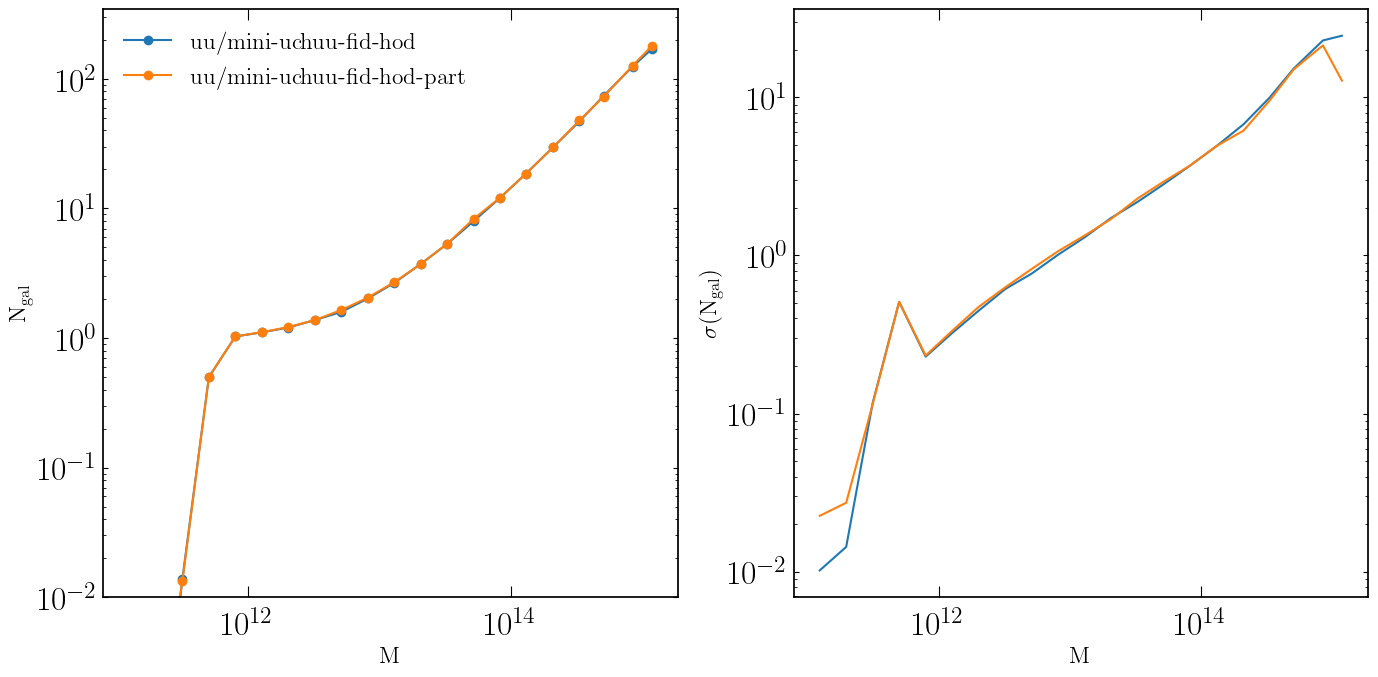

In [8]:
from plot_hod import PlotHOD
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
for yml_fname in yml_fname_list:
    ph = PlotHOD(yml_fname)
    mass, hod_mean, hod_std = ph.calc_hod(Mmin=1e11) # takes some time
    mass, hod_mean, hod_std = ph.plot_hod()
    ax0 = axes[0]
    ax0.loglog(mass, hod_mean, 'o-', label=yml_fname.replace('_','-')[15:-4])
    ax0.set_ylim(1e-2, None)
    ax0.legend()
    ax0.set_xlabel('M')
    ax0.set_ylabel(r'$\rm N_{gal}$')
    
    ax1 = axes[1]
    ax1.loglog(mass, hod_std)
    ax1.set_xlabel('M')
    ax1.set_ylabel(r'$\rm \sigma(N_{gal})$')

/bsuhome/hwu/scratch/hod-selection-bias/output_mini_uchuu//model_fid_hod_z0.1//richness_d90_vel.fit
/bsuhome/hwu/scratch/hod-selection-bias/output_mini_uchuu//model_fid_hod_z0.1_part//richness_d90_vel.fit


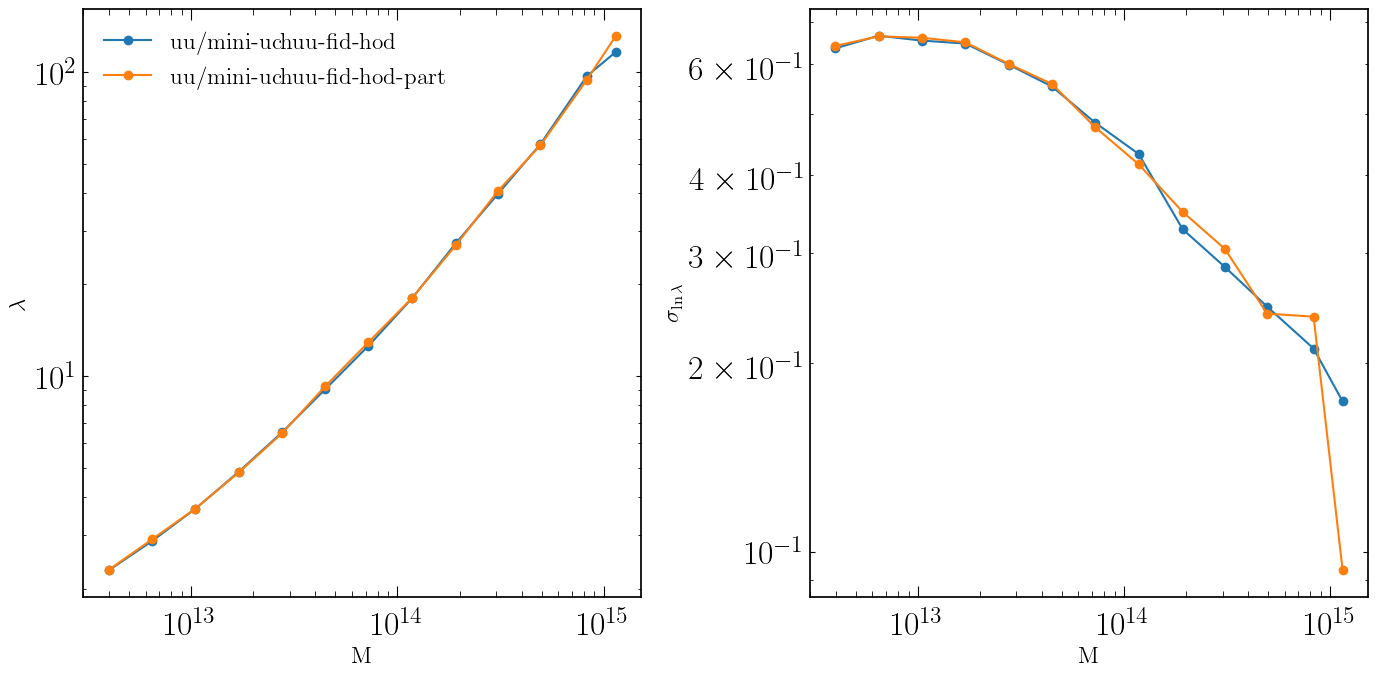

In [16]:
from plot_mor import plot_mor
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

for yml_fname in yml_fname_list:
    m, lam, sigma_lam = plot_mor(yml_fname)
    ax0 = axes[0]
    ax0.loglog(m, lam, 'o-', label=yml_fname.replace('_','-')[15:-4])
    ax0.set_xlabel('M')
    ax0.set_ylabel(r'$\lambda$')
    ax0.legend()

    ax1 = axes[1]
    ax1.loglog(m, sigma_lam, 'o-')
    ax1.set_xlabel('M')
    ax1.set_ylabel(r'$\sigma_{\ln\lambda}$')

(20, 108.3798386734368)

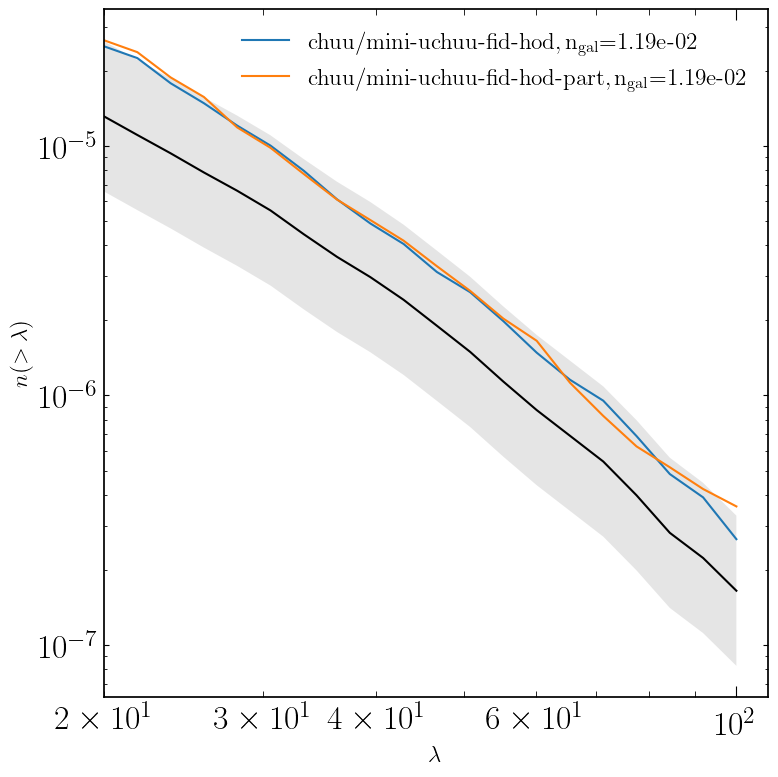

In [19]:
sys.path.append('../pipeline/')
from plot_counts_richness import PlotCountsRichness
fig, axes = plt.subplots(1, 1, figsize=(8, 8))
for yml_fname in yml_fname_list:
    ccr = PlotCountsRichness(yml_fname)
    ccr.calc_counts_richness()
    ccr.plot_counts_richness(axes=axes, label=yml_fname.replace('_','-')[13:-4])
ccr.plot_y1_counts_richness()
plt.xlim(20, None)